In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/steam-reviews-2021/steam_reviews.csv


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("najzeko/steam-reviews-2021")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/steam-reviews-2021


In [4]:
import pandas as pd
chunksize = 10**6  # 1 million rows at a time 
chunk_list = []  # List to hold the processed chunks

for chunk in pd.read_csv("/kaggle/input/steam-reviews-2021/steam_reviews.csv", chunksize=chunksize, low_memory=True):
    # Process each chunk here (e.g., filtering, aggregating)
    chunk_list.append(chunk)  # Optionally, append each chunk to a list if you need to merge them later

#Concatenate all chunks back into one dataframe
df = pd.concat(chunk_list)

In [5]:
#RQ2 

#Q1
app_reviews_number = df['app_name'].value_counts() # Dataframe with the number of reviews for each applications

app_max_reviews = app_reviews_number.idxmax() # The name of the applications with the most reviews

app_min_reviews = app_reviews_number.idxmin() # The name of the applications with the least reviews

print(app_max_reviews)
print(app_min_reviews)

PLAYERUNKNOWN'S BATTLEGROUNDS
Neon Hardcorps


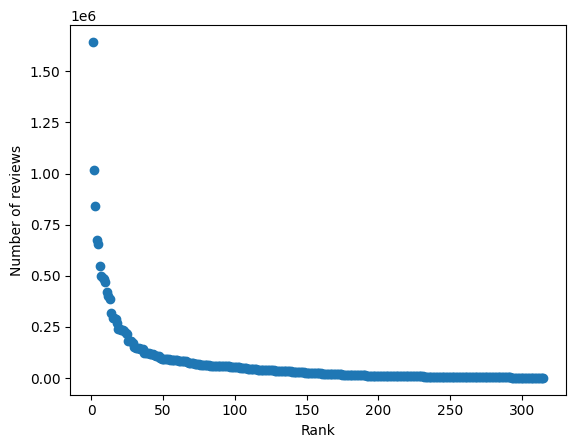

In [7]:
#Q2

import matplotlib.pyplot as plt

plt.scatter(range(1, len(app_reviews_number.values) + 1), app_reviews_number.values)


plt.xlabel('Rank')
plt.ylabel('Number of reviews')

plt.show()

This chart shows a long-tail distribution, where a small number of apps concentrate the majority of reviews, indicating that they dominate user interest. The curve drops quickly, showing that most apps have little engagement in terms of the number of reviews. This uneven distribution suggests that only a few apps manage to attract widespread attention, while the majority remain relatively little used.**

In [13]:
#Q3

top_5 = app_reviews_number.head(5) # Dataframe with the top 5 application by number of reviews 
top_5_apps = top_5.index # Name of the top 5 applications
total_review_top5_app = top_5.values.sum() # The number of reviews for the top 5 applications
df2 = df[df['app_name'].isin(top_5_apps)] # New dataframe with only top 5 application by number of reviews

top5_steam_purchase = df2.groupby(['app_name'])['steam_purchase'].sum().reset_index()   # Dataframe with the top 5 applications and the number of reviews from user who purchase the app 
top5_received_free = df2.groupby(['app_name'])['received_for_free'].sum().reset_index() # Dataframe with the top 5 applications and the number of reviews from user who get the app for free

total_review_purchase = top5_steam_purchase['steam_purchase'].sum() # The number of reviews for the top 5 applications from user who purchased
total_review_free = top5_received_free['received_for_free'].sum() # The number of reviews for the top 5 applications from user who get it for free

pourcentage_review_purchase = ( total_review_purchase / total_review_top5_app ) *100 #Pourcentage of reviews for the top 5 applications from user who purchased
print(pourcentage_review_purchase)

pourcentage_review_free = ( total_review_free / total_review_top5_app ) *100 #Pourcentage of reviews for the top 5 applications from user who get it for free
print(pourcentage_review_free)

83.98507291003776
3.75051617542765


These results show that a large majority of reviews (around 84%) come from users who purchased the application, while a small proportion (around 3.75%) come from users who received it for free. This suggests that user engagement and feedback for these popular apps comes primarily from paying customers.

A similarity between these apps could be that they attract a majority of paid user bases, with few reviews coming from users who have benefited from the app for free. This could indicate that these apps are seen as valuable by those willing to pay, or that paying users are more likely to leave a review. The low proportion of free reviews also suggests that distribution via promotions or free offers is limited for these very popular applications.

In [14]:
#Q4 
app_recommendations_number = df.groupby(['app_name'])['recommended'].sum().reset_index()  #DataFrame with the applications and their number of recommendations
most_recommended = app_recommendations_number.loc[app_recommendations_number['recommended'].idxmax()] # Most recommended application by number of recommendations
least_recommended = app_recommendations_number.loc[app_recommendations_number['recommended'].idxmin()] #Least ""
print(most_recommended, least_recommended)

app_name       PLAYERUNKNOWN'S BATTLEGROUNDS
recommended                           886417
Name: 182, dtype: object app_name       Neon Hardcorps
recommended                89
Name: 164, dtype: object


The most recommended app is PLAYERUNKNOWN'S BATTLEGROUNDS with 886,417 recommendations, while the least recommended app is Neon Hardcorps with only 89 recommendations. This contrast highlights a big difference in popularity and user engagement between the two apps.

In [18]:
#Q5

import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

df['review_score'] = df['votes_helpful'] / (df['votes_helpful'] + df['votes_funny']) # We create a review score based on 'votes_helpful' and 'votes_funny'

df = df.dropna(subset=['review_score']) #We clean the data 
df = df[(df['votes_helpful'] + df['votes_funny']) > 0]  # We avoid the division by zero

correlation, p_value = pearsonr(df['review_score'], df['recommended']) #Calculation of the correlation and the p-value which will help us to see if there is a relation between recommandation and review score

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')



Correlation coefficient: 0.008266257362072019
P-value: 9.276418505515204e-108


The correlation coefficient is 0.0083, which means that there is a negligible correlation between the review score and the number of recommendations. The variations in the score do not have a significant impact on the number of recommendations. 
The p-value is very low (9.28e-108), suggesting that although the correlation is weak, it is statistically significant. This means that we can reject the null hypothesis of no correlation, but the strength of the association is too weak to be of practical significance. 
To sum up, there is no significant link between the review score and the recommendations.

month
1      618218
2      488501
3      528622
4      456981
5      484621
6      712430
7      632871
8      489461
9      434929
10     505842
11    1015052
12     748488
dtype: int64


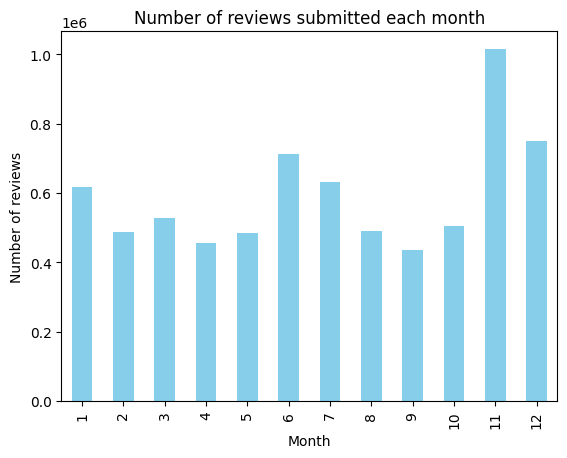

In [19]:
#RQ3

#Q1

df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s') # Convert the 'timestamp_created' column from UNIX timestamp format to datetime format

df['month'] = df['timestamp_created'].dt.month # Extract the month and create a new column named month
monthly_reviews = df.groupby('month').size() # Dataframe with the month and the number of reviews for each months
print(monthly_reviews)
monthly_reviews.plot(kind='bar', color='skyblue')
plt.title('Number of reviews submitted each month')
plt.xlabel('Month')
plt.ylabel('Number of reviews')

plt.show()

#Q2 Q3

The highest number of reviews occurs in winter, particularly in November, followed by December. This trend can be attributed to sales events like Black Friday in November and the fact that many people receive games as gifts in December. Additionally, there is a notable increase in reviews during the summer months of June and July, likely due to the summer holidays. February and August are the months with the fewest reviews, likely due to the conclusion of summer and winter holiday activities and events.

hour
0     249268
1     250922
2     252748
3     246862
4     239395
5     235115
6     235446
7     244558
8     258986
9     274321
10    287811
11    302859
12    321891
13    342963
14    364745
15    370813
16    363956
17    356374
18    362725
19    356495
20    339299
21    313839
22    283824
23    260801
dtype: int64


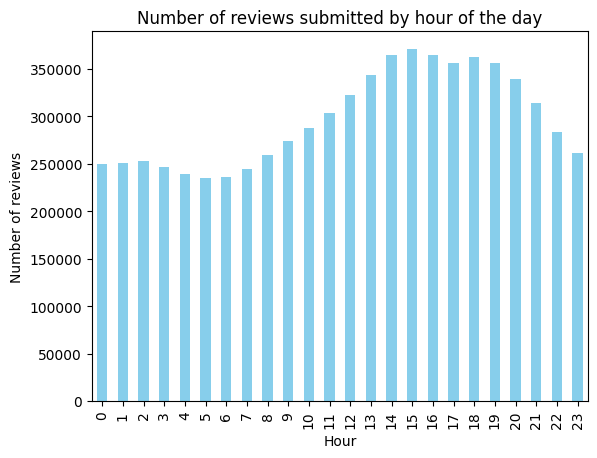

In [20]:
#Q4

df['hour'] = df['timestamp_created'].dt.hour  #Extract the hour and create a new column named hour
hourly_reviews = df.groupby('hour').size() # Dataframe with the hour and the number of reviews for each hours

print(hourly_reviews)

hourly_reviews.plot(kind='bar', color='skyblue')

plt.title('Number of reviews submitted by hour of the day') 
plt.xlabel('Hour')  
plt.ylabel('Number of reviews')  

plt.show()

If users predominantly write reviews in the early afternoon, their mood may be more relaxed and positive during this time, potentially leading to a bias in their feedback. Consequently, reviews submitted during these hours might be more favorable compared to those left late at night or early in the morning when users could be more tired or less focused.

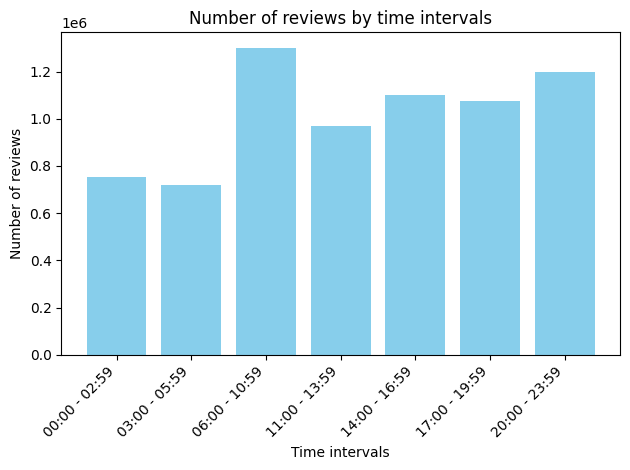

In [21]:
#Q5

def plot_reviews_by_time_intervals(time_intervals):
    review_per_interval = [] #List where we put the number of reviews for each interval of time 
    
    for start, end in time_intervals:
        count = df[(df['timestamp_created'].dt.time >= start) & 
                    (df['timestamp_created'].dt.time <= end)].shape[0] #We filter to keep only the review in our time interval and we count them by using the shape
        review_per_interval.append(count)
    
    
    intervals = [f"{start.strftime('%H:%M')} - {end.strftime('%H:%M')}" for start, end in time_intervals]
    plt.bar(intervals, review_per_interval, color='skyblue')
    plt.title('Number of reviews by time intervals')
    plt.xlabel('Time intervals')
    plt.ylabel('Number of reviews')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    plt.show()

time_intervals = [
    (pd.to_datetime('00:00:00').time(), pd.to_datetime('02:59:59').time()),
    (pd.to_datetime('03:00:00').time(), pd.to_datetime('05:59:59').time()),
    (pd.to_datetime('06:00:00').time(), pd.to_datetime('10:59:59').time()),
    (pd.to_datetime('11:00:00').time(), pd.to_datetime('13:59:59').time()),
    (pd.to_datetime('14:00:00').time(), pd.to_datetime('16:59:59').time()),
    (pd.to_datetime('17:00:00').time(), pd.to_datetime('19:59:59').time()),
    (pd.to_datetime('20:00:00').time(), pd.to_datetime('23:59:59').time())
]

plot_reviews_by_time_intervals(time_intervals)

The highest number of reviews occurs in the time interval between 06:00:00 and 10:59:59.
The lowest number of reviews occurs in the time interval between 03:00:00 and 05:59:59.
The number of reviews generally increases from the early morning hours to the late afternoon, with a slight dip in the early evening.
The number of reviews then increases again in the late evening and early night.